In [1]:
import pandas as pd
import importlib
import berechnen_wp, pv_profil, lastprofile_VDI4655, temperatur_aussen, try_region, heizkurve
importlib.reload(berechnen_wp)
importlib.reload(heizkurve)

h, w, twe, s = lastprofile_VDI4655.get_jahresenergiebedarf('1984 - 1994', 200, 3, 0)
TRY_region, T_n_aussen = try_region.get_try_t_n_aussen(40599)
df = lastprofile_VDI4655.get_lastprofile(w, s, twe, 200, TRY_region, 3)
df['T_aussen'] = temperatur_aussen.get_hourly_temperature(40599, 2014)
hz, T_soll, T_n_vor, T_n_rueck = heizkurve.get_heizkurve('Heizkörper', df['T_aussen'], T_n_aussen)
df['T_vor'] = hz['T_vor']
df['T_rueck'] = hz['T_rueck']
wp_groesse = berechnen_wp.get_waermepumpe(h)
heizleistung_auslegung = heizkurve.get_heizleistung(T_n_aussen, h, T_soll)
df = heizkurve.get_heizleistung_profil(df, heizleistung_auslegung)
df = heizkurve.get_cop(wp_groesse, df)
V_ps, PS_verlust, Q_ps = berechnen_wp.get_pufferspeicher(h, T_n_vor, T_n_rueck)
df, P_el, COP = berechnen_wp.ohne_pv(df, Q_ps, PS_verlust)
# pv = pv_profil.get_pv_profil(40599, 2014, 10)
# df_pv = berechnen_wp.mit_pv(df.copy(), pv)
# df_pvbs = berechnen_wp.mit_pvbs(df.copy(), pv, 10, 11)

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [2]:
pv = pv_profil.get_pv_profil(40599, 2014, 10)
df_pv = berechnen_wp.mit_pv(df.copy(), pv)
df_pvbs = berechnen_wp.mit_pvbs(df.copy(), pv, 10, 11)

In [3]:
importlib.reload(berechnen_wp)
strompreis = 0.358
ergebnisse_pv = berechnen_wp.ersparnis_pv(df_pv, 10, strompreis)
berechnen_wp.print_ersparnis(ergebnisse_pv)

Haushaltsstrombedarf in kWh: 4980
Wärmepumpe Strombedarf in kWh: 7163
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 3856
Geladene PV-Strom in Wärmepumpe in kWh: 1894

Netzbezug in kWh: 6393
Einspeisung ins Netz in kWh: 7426

Stromkosten ohne PV in €/a: 4347.39
Stromkosten mit PV in €/a: 2288.69
Einspeisevergütung in €/a: 591.11
Stromkosten Einsparung in €/a: 2649.81


In [4]:
importlib.reload(berechnen_wp)
ergebnisse_bs = berechnen_wp.ersparnis_bs(df_pvbs, 10, strompreis)
berechnen_wp.print_ersparnis(ergebnisse_bs)

Haushaltsstrombedarf in kWh: 4980
Wärmepumpe Strombedarf in kWh: 7163
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 5997
Geladene PV-Strom in Wärmepumpe in kWh: 1894
Geladene PV-Strom in Batteriespeicher in kWh: 2055
Geladene BS-Strom in Wärmepumoe in kWh: 563

Netzbezug in kWh: 6310
Einspeisung ins Netz in kWh: 5285

Stromkosten ohne PV in €/a: 4347.39
Stromkosten mit PV & BS in €/a: 2258.98
Einspeisevergütung in €/a: 420.69
Stromkosten Einsparung in €/a: 2509.1


In [5]:
importlib.reload(berechnen_wp)
df_ev = berechnen_wp.mit_pvev(df.copy(), pv, True)

In [6]:
importlib.reload(berechnen_wp)
df_pvbsev = berechnen_wp.mit_pvbsev(df.copy(), pv, 10, 11, True)

In [7]:
importlib.reload(berechnen_wp)
ergebnisse_ev = berechnen_wp.ersparnis_ev(df_ev, 10, 0.358)
berechnen_wp.print_ersparnis(ergebnisse_ev)

Haushaltsstrombedarf in kWh: 4980
Wärmepumpe Strombedarf in kWh: 7163
EV Strombedarf in kWh: 1994
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 4130
Geladene PV-Strom in Wärmepumpe in kWh: 1894
Geladene PV-Strom in Elektroauto in kWh: 274

Netzbezug in kWh: 10007
Einspeisung ins Netz in kWh: 7152

Stromkosten ohne PV in €/a: 5061.26
Stromkosten mit PV, BS & EV in €/a: 3582.51
Einspeisevergütung in €/a: 569.3
Stromkosten Einsparung in €/a: 2048.05


In [8]:
importlib.reload(berechnen_wp)
ergebnisse_evbs = berechnen_wp.ersparnis_evbs(df_pvbsev, 10, 0.358)
berechnen_wp.print_ersparnis(ergebnisse_evbs)

Haushaltsstrombedarf in kWh: 4980
Wärmepumpe Strombedarf in kWh: 7163
EV Strombedarf in kWh: 1994
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 6551
Geladene PV-Strom in Wärmepumpe in kWh: 1894
Geladene PV-Strom in Batteriespeicher in kWh: 2423
Geladene PV-Strom in Elektroauto in kWh: 171
Geladene BS-Strom in Elektroauto in kWh: 815
Geladene BS-Strom in Wärmepumoe in kWh: 548

Netzbezug in kWh: 7780
Einspeisung ins Netz in kWh: 4731

Stromkosten ohne PV in €/a: 5061.26
Stromkosten mit PV, BS & EV in €/a: 2785.24
Einspeisevergütung in €/a: 376.59
Stromkosten Einsparung in €/a: 2652.61


## mit HEMS

In [8]:
Q_ps

3.483

In [12]:
dichte = 1 # kg/m^3
c_wasser = 4.18 # kJ/(kg·K)
Q_ps_n = 10.69
V_ps_n = round(Q_ps_n/(dichte*c_wasser*(55 - 45)/3600), 3)
V_ps_n

920.67

In [11]:
round(3.48/(dichte*c_wasser*(55 - 45)/3600), 3)


299.713

In [13]:
1.52/24

0.06333333333333334

In [14]:
3.583-1.875

1.7080000000000002

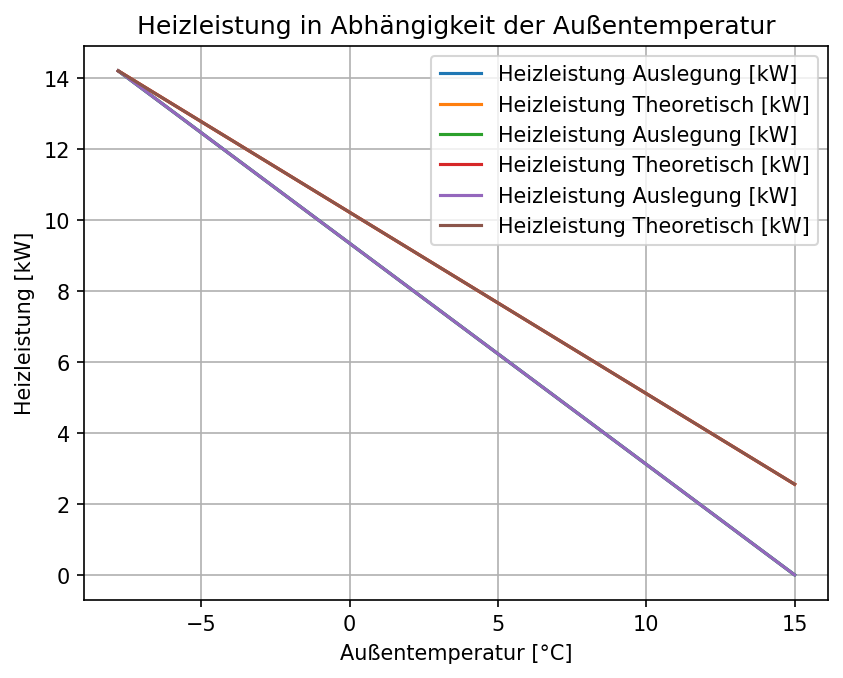

<module 'matplotlib.pyplot' from 'c:\\Users\\DianaEspinosaLozano\\anaconda3\\envs\\thesis_venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline
heizkurve.plot_heizleistung(heizleistung_auslegung)

In [19]:
df['Heizleistung'].max()

12.02017543859649